## Introduction
The second-hand car market is one of the most dynamic and diverse markets in the automotive industry. Prices of used cars are influenced by multiple factors such as brand, model, age, mileage, fuel type, transmission, and even geographical location. Predicting the price of a used car is therefore a complex task that requires careful preparation of data before applying machine learning models.

Feature engineering and dimensionality reduction play a crucial role in this process. Feature engineering helps to transform raw attributes into meaningful variables that capture hidden patterns, while dimensionality reduction ensures that redundant or irrelevant features are removed, thereby improving model efficiency and reducing noise. By applying these techniques to a second-hand car sales dataset, this project aims to build a cleaner, more informative feature set that enhances predictive performance while maintaining interpretability.

## Dataset Overview

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv(r'C:\Users\USER\OneDrive\Desktop\Advanced Machine Learning\Week 1\second_hand_cars.csv')
df.head()

,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Price,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories
0,Maruti Suzuki,Cruze,EX,CNG,Needs Replacement,2018,Second,84-436-5584,52798,759107,Manual,Grey,Major Service at 50418 km,No Current Insurance,Not Available,"Music System, Sunroof, Alloy Wheels"
1,Kia,Seltos,RXE,Petrol,New,2020,Third,79-114-3166,43412,505071,Automatic,Maroon,Major Service at 131313 km,No Current Insurance,Available,NaN
2,Kia,Accord,RXE,Petrol,New,2022,Second,41-358-3344,95219,635322,Automatic (Tiptronic),Black,No Service Record,No Current Insurance,Available,NaN
3,Nissan,Seltos,Highline,Diesel,Used,2024,Third,92-708-1763,70370,483152,Automatic (Tiptronic),Maroon,Major Service at 98115 km,Valid Until [date],Available,"Music System, Alloy Wheels"
4,Chevrolet,Kwid,Highline,Petrol,Used,2018,Second,76-154-5485,85852,712961,Automatic (Tiptronic),Silver,Major Service at 135665 km,No Current Insurance,Not Available,"GPS, Music System"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company Name              2500 non-null   object
 1   Car Name                  2500 non-null   object
 2   Variant                   2238 non-null   object
 3   Fuel Type                 2500 non-null   object
 4   Tyre Condition            2500 non-null   object
 5   Make Year                 2500 non-null   int64 
 6   Owner Type                2500 non-null   object
 7   Registration Number       2500 non-null   object
 8   Mileage                   2500 non-null   int64 
 9   Price                     2500 non-null   int64 
 10  Transmission Type         2500 non-null   object
 11  Body Color                2500 non-null   object
 12  Service Record            2500 non-null   object
 13  Insurance                 2500 non-null   object
 14  Registration Certificate

In [4]:
df.describe()

,Make Year,Mileage,Price
count,2500.000000,2500.000000,2500.000000
mean,2019.521600,104777.792000,608120.897600
std,2.894146,55544.487467,231056.126713
min,2015.000000,10010.000000,200176.000000
25%,2017.000000,56313.000000,407791.000000
50%,2020.000000,104209.500000,612012.500000
75%,2022.000000,152149.250000,804567.000000
max,2024.000000,199755.000000,999826.000000


In [5]:
df.isnull().sum()

Company Name                  0
Car Name                      0
Variant                     262
Fuel Type                     0
Tyre Condition                0
Make Year                     0
Owner Type                    0
Registration Number           0
Mileage                       0
Price                         0
Transmission Type             0
Body Color                    0
Service Record                0
Insurance                     0
Registration Certificate      0
Accessories                 482
dtype: int64

In [6]:
# handling missing values
df['Variant'].fillna('Unknown', inplace=True)
df['Accessories'].fillna('Not Available', inplace=True)

df.isnull().sum()

C:\Users\USER\AppData\Local\Temp\ipykernel_8296\3791354545.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Variant'].fillna('Unknown', inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_8296\3791354545.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

Company Name                0
Car Name                    0
Variant                     0
Fuel Type                   0
Tyre Condition              0
Make Year                   0
Owner Type                  0
Registration Number         0
Mileage                     0
Price                       0
Transmission Type           0
Body Color                  0
Service Record              0
Insurance                   0
Registration Certificate    0
Accessories                 0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

The dataset contained missing values in two columns: Variant (262 missing) and Accessories (482 missing). To preserve data integrity, the missing values in Variant were imputed with the category "Unknown", while those in Accessories were replaced with "Not Specified". All other columns had complete data with no missing entries. Duplicate records were also checked, and none were found.

# 4. Feature Engineering

## Creating New Features

In [8]:
current_year = 2025
df['Car_Age'] = current_year - df['Make Year']
df['Price_per_Mile'] = df.apply(lambda x: x['Price'] / x['Mileage'] if x['Mileage'] > 0 else 0, axis=1)

print(df[['Make Year', 'Car_Age', 'Mileage', 'Price', 'Price_per_Mile']].head())


   Make Year  Car_Age  Mileage   Price  Price_per_Mile
0       2018        7    52798  759107       14.377571
1       2020        5    43412  505071       11.634364
2       2022        3    95219  635322        6.672219
3       2024        1    70370  483152        6.865880
4       2018        7    85852  712961        8.304536


Two new features were added to improve the dataset. Car Age was calculated as the difference between 2025 and the car’s manufacturing year, making depreciation easier to capture. Price per Mile was created by dividing price by mileage, with zero values handled safely. These features provide a clearer picture of car value and usage.

## Encoding Categorical Features

In [9]:
categorical_cols = [
    'Company Name', 'Car Name', 'Variant', 'Fuel Type', 'Tyre Condition',
    'Owner Type', 'Transmission Type', 'Body Color', 'Service Record',
    'Insurance', 'Registration Certificate', 'Accessories'
]

# one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)
print(df_encoded.head())

   Make Year Registration Number  Mileage   Price  Car_Age  Price_per_Mile  \
0       2018         84-436-5584    52798  759107        7       14.377571   
1       2020         79-114-3166    43412  505071        5       11.634364   
2       2022         41-358-3344    95219  635322        3        6.672219   
3       2024         92-708-1763    70370  483152        1        6.865880   
4       2018         76-154-5485    85852  712961        7        8.304536   

   Company Name_Ford  Company Name_Honda  Company Name_Hyundai  \
0                  0                   0                     0   
1                  0                   0                     0   
2                  0                   0                     0   
3                  0                   0                     0   
4                  0                   0                     0   

   Company Name_Kia  ...  \
0                 0  ...   
1                 1  ...   
2                 1  ...   
3                 0  .

Categorical variables were converted into numerical form using One-Hot Encoding.

## Correlation Analysis

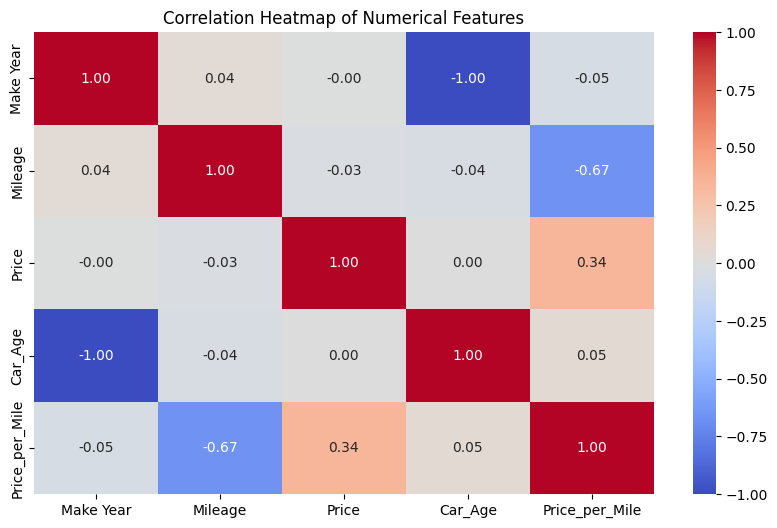

In [10]:
numeric_df = df.select_dtypes(include=["int64", "float64"])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [11]:
# remove highly correlated features
df_encoded = df_encoded.drop('Make Year', axis=1)

The results showed that Make Year and Car Age were perfectly correlated, meaning they contained the same information in inverse form. To avoid multicollinearity and reduce feature redundancy, Make Year was removed, while Car Age was retained as it provides a more interpretable representation of the vehicle’s age.

# Dimensionality Reduction

## Principal Component Analysis (PCA)

PCA was applied to the standardized dataset to reduce dimensionality while retaining most of the variance. The explained variance ratio showed that each individual component contributed a small fraction of the total variance, but the cumulative explained variance quickly approached 95% with a subset of components.

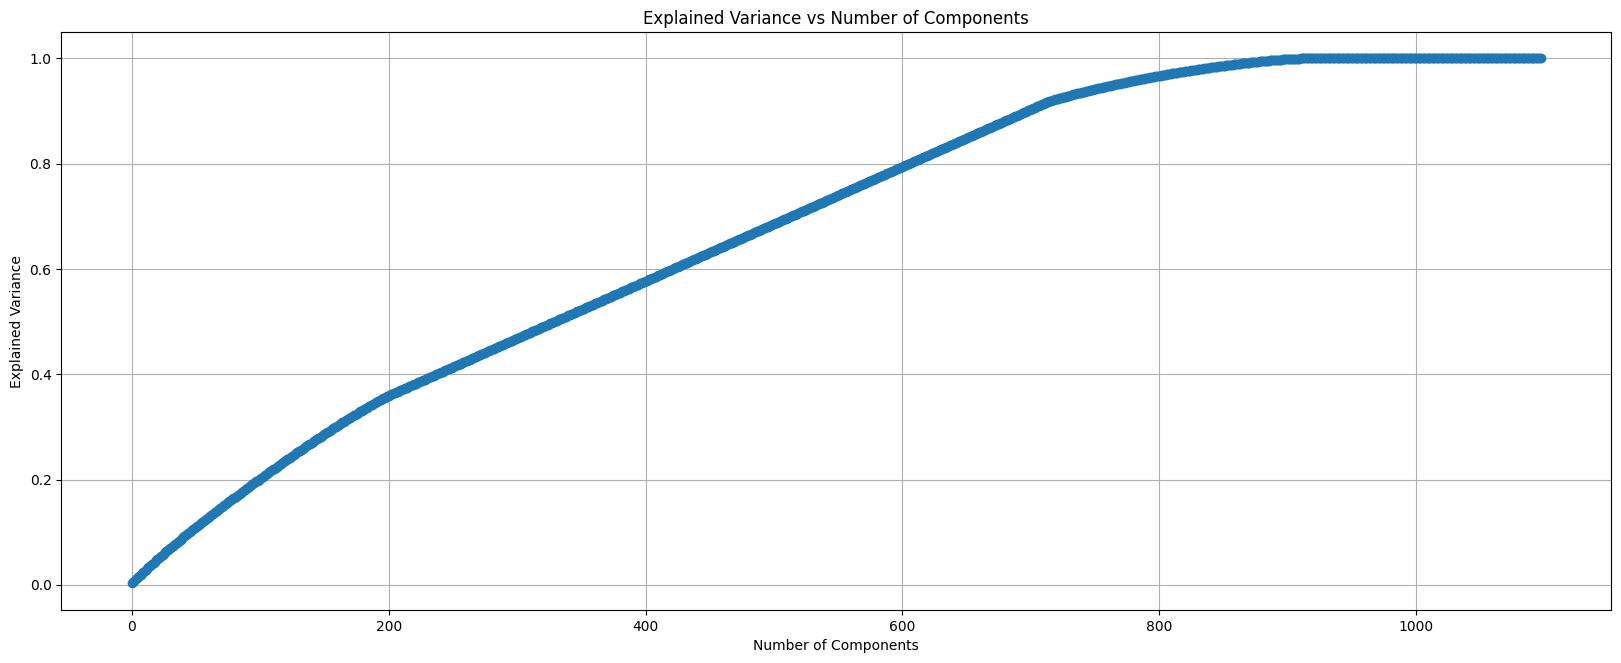

In [ ]:
X = df_encoded.drop(['Price', 'Registration Number'], axis=1)
y = df_encoded['Price']

X_numeric = X.select_dtypes(include=np.number)

X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA()
X_train_pca_full = pca.fit_transform(X_train_scaled)

variance = pca.explained_variance_ratio_
components = np.arange(len(variance))

plt.figure(figsize=(20, 7.5))
plt.plot(components, np.cumsum(variance), marker='o', linestyle='--')
plt.ylabel("Explained Variance")
plt.xlabel("Number of Components")
plt.title("Explained Variance vs Number of Components")
plt.grid(True)
plt.show()

In [ ]:
cumulative_variance = np.cumsum(variance)

n_components_99 = np.argmax(cumulative_variance >= 0.99) + 1
print("Number of components to retain 95% variance:", n_components_95)

Number of components to retain 95% variance: 864


In [32]:
pca_opt = PCA(n_components=929)
X_train_pca = pca_opt.fit_transform(X_train_scaled)
X_test_pca = pca_opt.transform(X_test_scaled)

X_train_final = pd.DataFrame(X_train_pca)
X_test_final = pd.DataFrame(X_test_pca)

print("Training shape:", X_train_final.shape)
print("Test shape:", X_test_final.shape)

Training shape: (2000, 929)
Test shape: (500, 929)


PCA reduced the original feature space of 1,098 dimensions to 929 principal components while retaining 95% of the variance.

Linear separability

# Modeling and Evaluation

Model Selection

In [15]:
# Linear Regression
pipe = make_pipeline(PolynomialFeatures(degree=1), LinearRegression())
scores = cross_val_score(pipe, X_train_final, y_train, cv=5, scoring="r2")
print(scores, scores.mean())

[ 0.00330416  0.00726824 -0.10939117 -0.03438591  0.073762  ] -0.01188853702379471


In [16]:
# Ridge Regression
pipe = make_pipeline(PolynomialFeatures(degree=1), Ridge(alpha=10, random_state=42))
scores = cross_val_score(pipe, X_train_final, y_train, cv=5, scoring="r2")
print(scores, scores.mean())

[ 0.00979017  0.01771987 -0.09614927 -0.02822845  0.07741562] -0.0038904118917094887


In [17]:
pipe = make_pipeline(StandardScaler(), KernelRidge(kernel='poly', degree=2, alpha=1))
scores = cross_val_score(pipe, X_train_final, y_train, cv=5, scoring="r2")
print(scores, scores.mean())

[-0.01273212  0.0018155  -0.06096381  0.00376783  0.05418197] -0.0027861254606883932


In [18]:
# Lasso
pipe = make_pipeline(PolynomialFeatures(degree=1),Lasso(alpha=0.1, max_iter=10000, random_state=42))
scores = cross_val_score(pipe, X_train_final, y_train, cv=5, scoring="r2")
print(scores, scores.mean())

[-0.02284503 -0.07847404 -0.14854476 -0.13948329 -0.0726999 ] -0.09240940459239311


In [19]:
# Random Forest
model = RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42, n_jobs=-1)
scores = cross_val_score(model, X_train_final, y_train, cv=5, scoring="r2")
print(scores, scores.mean())

[0.12366812 0.16744348 0.13118292 0.08344769 0.09447297] 0.12004303701260413


In [20]:
# SVR
model = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=10, gamma='scale'))
scores = cross_val_score(model, X_train_final, y_train, cv=5, scoring="r2")
print(scores, scores.mean())

[-1.16661466e-03 -8.98624116e-03 -1.24004234e-05 -1.14252856e-03
 -9.00033846e-04] -0.0024415637308373927


In [21]:
# Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=300,learning_rate=0.1,max_depth=3,random_state=42)
scores = cross_val_score(model, X_train_final, y_train, cv=5, scoring="r2")
print(scores, scores.mean())

[0.10209306 0.09426198 0.11489738 0.11887394 0.14036113] 0.11409749787887855


Linear, Ridge, and Lasso regressions performed poorly, with negative R² values and very high error metrics, indicating that linear models were unsuitable for this problem. In contrast, ensemble models (Random Forest and Gradient Boosting) achieved significantly better performance, with Random Forest slightly outperforming Gradient Boosting. This suggests that non-linear ensemble methods are more effective in capturing the complex relationships in the data.

## Hyperparameter tuning

In [22]:
n_estimators = [100, 200, 300, 500, 800]
learning_rate = [0.01, 0.05, 0.1, 0.2]
max_depth = [2, 3, 4, 5]
subsample = [0.6, 0.8, 1.0]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

param_grid = dict(n_estimators=n_estimators,learning_rate=learning_rate,max_depth=max_depth,subsample=subsample,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
print(param_grid)

{'n_estimators': [100, 200, 300, 500, 800], 'learning_rate': [0.01, 0.05, 0.1, 0.2], 'max_depth': [2, 3, 4, 5], 'subsample': [0.6, 0.8, 1.0], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [24]:
# define the Randomized Search CV
gb = GradientBoostingRegressor(random_state=42)
reg = RandomizedSearchCV(gb, param_grid, cv=5, scoring="r2", n_iter=20, random_state=42, n_jobs=-1)
reg.fit(X_train_final, y_train)

print(reg.best_score_, reg.best_params_)

0.14436294620750964 {'subsample': 0.6, 'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.01}


## Learning and loss curve

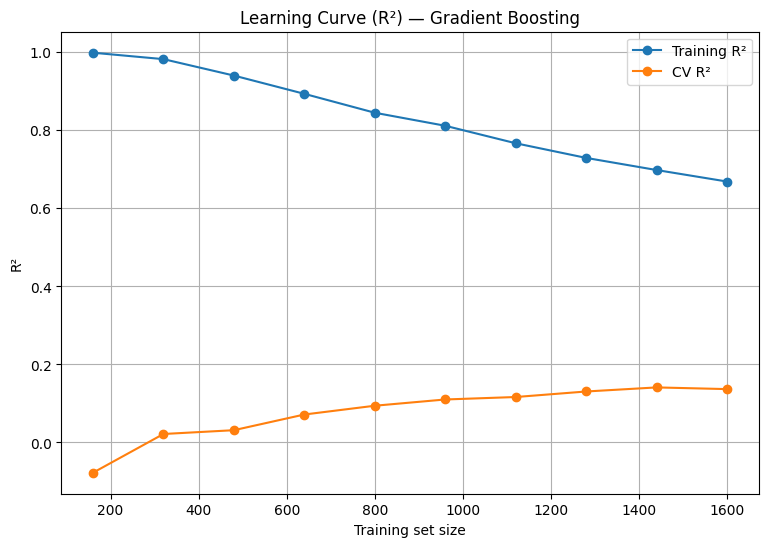

In [30]:
# Learning curve
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42)

train_sizes, train_scores_r2, val_scores_r2 = learning_curve(estimator=model,X=X_train_final,y=y_train,cv=5,scoring="r2",n_jobs=-1,train_sizes=np.linspace(0.1, 1.0, 10),shuffle=True,random_state=42)

train_mean_r2 = np.mean(train_scores_r2, axis=1)
val_mean_r2 = np.mean(val_scores_r2, axis=1)

plt.figure(figsize=(9,6))
plt.plot(train_sizes, train_mean_r2, marker='o', label='Training R²')
plt.plot(train_sizes, val_mean_r2, marker='o', label='CV R²')
plt.xlabel("Training set size")
plt.ylabel("R²")
plt.title("Learning Curve (R²) — Gradient Boosting")
plt.legend()
plt.grid(True)
plt.show()

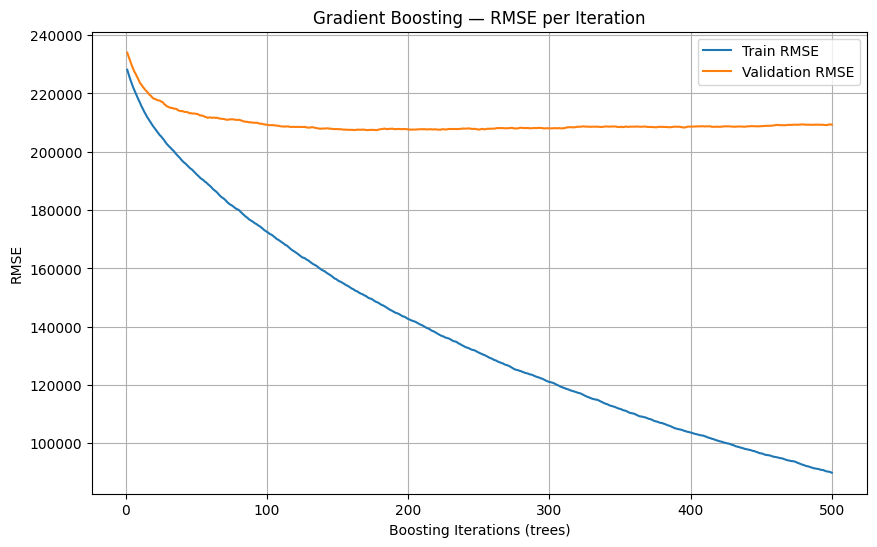

In [29]:
# Loss curve
gb = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=3, random_state=42)
gb.fit(X_train_final, y_train)

n_estimators = gb.n_estimators
train_mse = np.empty(n_estimators)
val_mse = np.empty(n_estimators)

for i, y_pred_train in enumerate(gb.staged_predict(X_train_final)):
    train_mse[i] = mean_squared_error(y_train, y_pred_train)

for i, y_pred_val in enumerate(gb.staged_predict(X_test_final)):
    val_mse[i] = mean_squared_error(y_test, y_pred_val)

train_rmse = np.sqrt(train_mse)
val_rmse = np.sqrt(val_mse)

plt.figure(figsize=(10,6))
plt.plot(np.arange(1, n_estimators+1), train_rmse, label='Train RMSE')
plt.plot(np.arange(1, n_estimators+1), val_rmse, label='Validation RMSE')
plt.xlabel("Boosting Iterations (trees)")
plt.ylabel("RMSE")
plt.title("Gradient Boosting — RMSE per Iteration")
plt.legend()
plt.grid(True)
plt.show()

## Error analysis

MAE: 176381.16
RMSE: 207128.40
R2: 0.2258


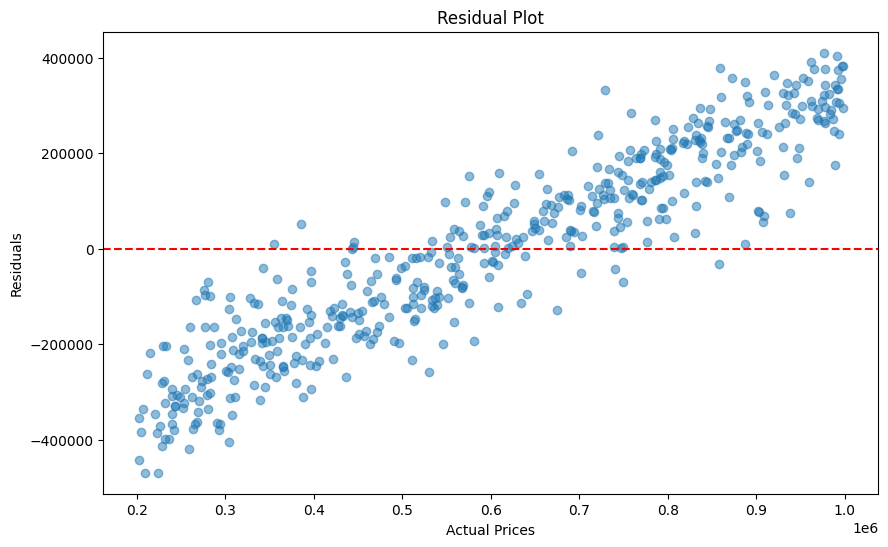

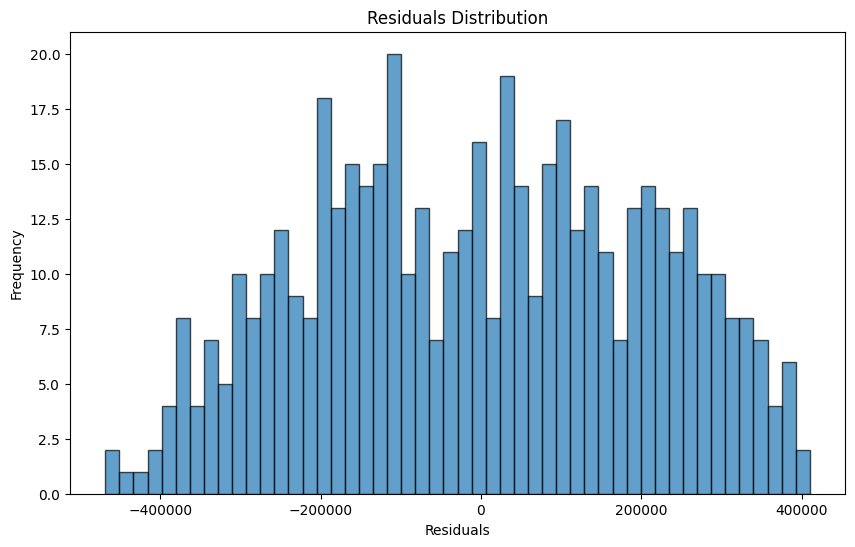

Top 10 largest errors:
      Actual      Predicted       Residual      Abs_Error
56    209682  678399.174466 -468717.174466  468717.174466
2162  224248  692685.935206 -468437.935206  468437.935206
1901  202627  644622.058906 -441995.058906  441995.058906
527   259076  678051.576043 -418975.576043  418975.576043
1928  228711  640940.836964 -412229.836964  412229.836964
602   976029  565753.935336  410275.064664  410275.064664
695   303799  708174.761904 -404375.761904  404375.761904
1514  991289  588372.840760  402916.159240  402916.159240
978   231618  629880.850280 -398262.850280  398262.850280
188   236416  634138.222538 -397722.222538  397722.222538


In [ ]:
y_pred = reg.predict(X_test_final)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.4f}")

residuals = y_test - y_pred

plt.figure(figsize=(10,6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

The residual analysis for the Random Forest model showed that errors are generally centered around zero, indicating no major bias. However, the spread of errors increases for higher-priced vehicles, suggesting that the model struggles to capture price dynamics in the luxury segment. Outliers with very large errors further highlight the need for additional domain-specific features or targeted modeling strategies for extreme price ranges.